In [19]:
# import library
# - m pip install dtw 
import sys
import seaborn as sns
from dtw import dtw
import librosa, librosa.display, os 
import pandas as pd
import numpy as np
from numpy.linalg import norm
from dtw import dtw
import matplotlib.pyplot as plt
import wave

# plot single commend
spf = wave.open('Blanka_zapis/0.wav','r')

#Extract Raw Audio from Wav File
signal = spf.readframes(-1)
signal = np.fromstring(signal, 'Int16')
fs = spf.getframerate()

Time=np.linspace(0, len(signal)/fs, num=len(signal))


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


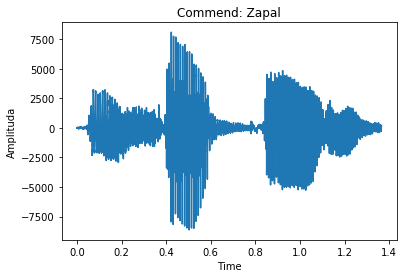

In [20]:
plt.figure(1)
plt.title('Commend: Zapal')
plt.plot(Time,signal)
plt.ylabel('Amplituda')
plt.xlabel('Time')
plt.show()


path = 'Blanka_zapis/'
signals = list()
dataset_mfcc = list()
labels = open('commend.txt','r').read().split('\n')
set_labels = set(labels)
label_dict = dict()
word_number=dict()
for label in set(labels):
    indices = [i for i, x in enumerate(labels) if x == label]
    label_dict[label] = indices
    word_number[label]=len(indices)

In [21]:
feature_dict = dict()
for key in label_dict:
    list_signals = list()
    len_signal = list()
    for el in label_dict[key]:
        filename = "%d.wav"%(el)
        signal, sr = librosa.load(os.path.join(path,filename)) #lista sygnalow
        list_signals.append(signal)
        len_signal.append(len(signal))
    #print(list_signals)
    maks_len = np.max(len_signal)
    mfcc_list = list()
    for signal in list_signals:
        signal = np.pad(signal, (0,maks_len-len(signal)), 'mean')
        mfcc = librosa.feature.mfcc(signal, sr)
        mfcc_list.append(mfcc)
    mean = np.mean( mfcc_list, axis=0 )
    feature_dict[key] = mean
#print(feature_dict)

In [22]:
error = 0

#create matrix
dataFrame = pd.DataFrame(index = set_labels, columns=set_labels, dtype='float')
dataFrame = dataFrame.fillna(0)

#recognition
for filename in os.listdir('komendy/'):
    y1, sr1 = librosa.load('komendy/'+filename)
    mfcc1 = librosa.feature.mfcc(y1, sr1)
    min_dist = 1000
    for key in feature_dict:
        mfcc2 = feature_dict[key]
        dist, cost, acc_cost, path = dtw(mfcc1.T, mfcc2.T, dist=lambda x, y: norm(x - y, ord=1))
        if dist<min_dist:
            min_dist = dist
            value = key
    index = filename.split('.')[0]
    
    if value == labels[int(index)]:
       # print("%s detected correct"%(value))
        dataFrame.loc[labels[int(index)],value]+=1 #count how many times value is recognized as labels[int(index)]
    else:
       # print("%s detected incorrect, should be %s"%(value, labels[int(index)]))
        error+=1
        dataFrame.loc[labels[int(index)],value]+=1

print(dataFrame)

            USTAW  KANAL    W   DO  ROLETY    O  JEDEN  PRZYCISZ  KAWE  RADIO  \
USTAW         2.0    0.0  0.0  0.0     0.0  0.0    1.0       0.0   0.0    0.0   
KANAL         0.0    2.0  0.0  0.0     0.0  0.0    0.0       0.0   1.0    1.0   
W             0.0    0.0  5.0  1.0     0.0  0.0    9.0       0.0   0.0    0.0   
DO            0.0    0.0  0.0  4.0     0.0  0.0    0.0       0.0   0.0    0.0   
ROLETY        0.0    0.0  0.0  0.0     4.0  0.0    0.0       0.0   0.0    0.0   
O             0.0    0.0  0.0  0.0     0.0  4.0    0.0       0.0   0.0    0.0   
JEDEN         0.0    0.0  0.0  0.0     0.0  0.0    4.0       0.0   0.0    0.0   
PRZYCISZ      0.0    0.0  0.0  0.0     0.0  0.0    0.0       4.0   0.0    0.0   
KAWE          0.0    0.0  0.0  0.0     0.0  0.0    0.0       0.0   3.0    0.0   
RADIO         0.0    0.0  0.0  0.0     0.0  0.0    0.0       0.0   0.0    3.0   
ZAKREC        0.0    0.0  0.0  0.0     0.0  0.0    0.0       0.0   0.0    0.0   
DRZWI         0.0    0.0  0.

In [26]:
#macierz zwykła
for i in set_labels:
    for j in set_labels:
        dataFrame.loc[i,j]=dataFrame.loc[i,j]
       
print(dataFrame)
dataFrame.to_excel('macierz_zwykla.xls')

#macierz procentowa
for i in set_labels:
    for j in set_labels:
        dataFrame.loc[i,j]=dataFrame.loc[i,j]*100/word_number[i]
       
print(dataFrame)
dataFrame.to_excel('macierz_procentowa.xls')

            USTAW  KANAL      W      DO  ROLETY      O   JEDEN  PRZYCISZ  \
USTAW        50.0    0.0   0.00    0.00     0.0    0.0   25.00       0.0   
KANAL         0.0   50.0   0.00    0.00     0.0    0.0    0.00       0.0   
W             0.0    0.0  31.25    6.25     0.0    0.0   56.25       0.0   
DO            0.0    0.0   0.00  100.00     0.0    0.0    0.00       0.0   
ROLETY        0.0    0.0   0.00    0.00   100.0    0.0    0.00       0.0   
O             0.0    0.0   0.00    0.00     0.0  100.0    0.00       0.0   
JEDEN         0.0    0.0   0.00    0.00     0.0    0.0  100.00       0.0   
PRZYCISZ      0.0    0.0   0.00    0.00     0.0    0.0    0.00     100.0   
KAWE          0.0    0.0   0.00    0.00     0.0    0.0    0.00       0.0   
RADIO         0.0    0.0   0.00    0.00     0.0    0.0    0.00       0.0   
ZAKREC        0.0    0.0   0.00    0.00     0.0    0.0    0.00       0.0   
DRZWI         0.0    0.0   0.00    0.00     0.0    0.0    0.00       0.0   
KWIATKI     

In [24]:

success = (171-error)/171*100
print('Success rate: %.2f percent'%(success))

Success rate: 55.56 percent
